In [57]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add the src directory t\ the Python path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Now you can import the TimeSeriesDataset class
from src.TimeSeriesDataset import TimeSeriesDataset as TSD
from src.utils import download_data, weighted_mean
from src.mappings import value_mapping, ideology_mapping, social_complexity_mapping

In [61]:
dataset_PT = TSD(categories=['sc'], file_path="../datasets/PT_dataset_imputed.csv")

Dataset loaded from ../datasets/PT_dataset_imputed.xlsx


In [62]:
dataset_PT.scv_imputed

,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Hierarchy_sq,Government,Infrastructure,Information,Money,dataset,MSP,Crisis,duration,Scale_1,Inst_1,Comp
0,Latium,187,it_ravenna_exarchate,584,6.000000,4.698970,4.477121,5.216312,27.209909,0.636364,0.833333,0.866667,0.833333,PT,1.000000,0.0,6,-1.332933,1.168083,24.775758
1,Kansai,147,jp_heian,1036,6.675883,5.444206,5.243038,3.875723,15.021228,0.818182,0.750000,0.866667,0.833333,PT,0.750000,0.0,20,0.147762,0.987729,24.987879
2,NaN,571,ru_romanov_dyn_2,1796,7.777418,7.231829,5.681181,11.500000,132.250000,0.545455,0.916667,0.933333,1.000000,PT,NaN,0.0,34,2.240521,NaN,27.569697
3,NaN,567,at_habsburg_2,1711,7.414973,8.828271,5.397940,9.000000,81.000000,1.000000,0.833333,0.800000,1.000000,PT,NaN,0.0,6,2.724823,NaN,27.133333
4,NaN,571,ru_romanov_dyn_2,1894,8.028075,7.322499,6.285420,11.500000,132.250000,0.727273,0.916667,0.933333,1.000000,PT,NaN,0.0,13,2.940304,NaN,28.115152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,NaN,780,bd_chandra_dyn,975,NaN,NaN,NaN,NaN,NaN,0.090909,0.416667,0.533333,0.833333,PT,0.840541,NaN,45,NaN,-1.454461,17.806061
3129,NaN,780,bd_chandra_dyn,1000,NaN,NaN,NaN,NaN,NaN,0.090909,0.416667,0.533333,0.833333,PT,0.840541,NaN,25,NaN,-1.454461,17.806061
3130,NaN,780,bd_chandra_dyn,1020,NaN,NaN,NaN,NaN,NaN,0.090909,0.416667,0.533333,0.833333,PT,0.840541,NaN,20,NaN,-1.454461,17.806061
3131,NaN,780,bd_chandra_dyn,1050,NaN,NaN,NaN,NaN,NaN,0.090909,0.416667,0.533333,0.833333,PT,0.840541,NaN,30,NaN,-1.454461,17.806061


In [59]:
scale_cols = ['Pop','Terr','Cap','Hierarchy']
non_scale_cols = ['Government', 'Infrastructure', 'Information', 'Money','MSP']
input_cols = scale_cols + non_scale_cols
crisis_cols = ['overturn', 'predecessor_assassination', 'intra_elite',
       'military_revolt', 'popular_uprising', 'separatist_rebellion',
       'external_invasion', 'external_interference']
for col in crisis_cols:
    dataset_PT.scv_imputed[col] = np.nan
for ind, row in dataset_PT.scv_imputed.iterrows():
    for col in crisis_cols:
        try:
            col_value = dataset_PT.scv.loc[(dataset_PT.scv.PolityID == row.PolityID)&(dataset_PT.scv.Year == row.Year), col].values[0]
        except:
            print(row.PolityID, row.Year)
            continue
        dataset_PT.scv_imputed.loc[ind, col] = col_value

187 584
187 584
187 584
187 584
187 584
187 584
187 584
187 584
147 1036
147 1036
147 1036
147 1036
147 1036
147 1036
147 1036
147 1036
571 1796
571 1796
571 1796
571 1796
571 1796
571 1796
571 1796
571 1796
567 1711
567 1711
567 1711
567 1711
567 1711
567 1711
567 1711
567 1711
571 1894
571 1894
571 1894
571 1894
571 1894
571 1894
571 1894
571 1894
147 930
147 930
147 930
147 930
147 930
147 930
147 930
147 930
147 1016
147 1016
147 1016
147 1016
147 1016
147 1016
147 1016
147 1016
135 1451
135 1451
135 1451
135 1451
135 1451
135 1451
135 1451
135 1451
135 1414
135 1414
135 1414
135 1414
135 1414
135 1414
135 1414
135 1414
137 1819
137 1819
137 1819
137 1819
137 1819
137 1819
137 1819
137 1819
147 1165
147 1165
147 1165
147 1165
147 1165
147 1165
147 1165
147 1165
803 1726
803 1726
803 1726
803 1726
803 1726
803 1726
803 1726
803 1726
590 378
590 378
590 378
590 378
590 378
590 378
590 378
590 378
50 1453
50 1453
50 1453
50 1453
50 1453
50 1453
50 1453
50 1453
188 847
188 847
188 847


In [55]:
dataset_PT.scv_imputed[crisis_cols] = dataset_PT.scv_imputed[crisis_cols].fillna(0)
dataset_PT.scv_imputed.dropna(subset=input_cols, inplace=True)
dataset_PT.scv_imputed.reset_index(drop=True, inplace=True)
dataset_PT.scv_imputed.columns

Index(['NGA', 'PolityID', 'PolityName', 'Year', 'Pop', 'Terr', 'Cap',
       'Hierarchy', 'Hierarchy_sq', 'Government', 'Infrastructure',
       'Information', 'Money', 'dataset', 'MSP', 'Crisis', 'duration',
       'Scale_1', 'Inst_1', 'Comp', 'overturn', 'predecessor_assassination',
       'intra_elite', 'military_revolt', 'popular_uprising',
       'separatist_rebellion', 'external_invasion', 'external_interference'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0

Feature ranking:
1. feature 1 (0.000000)
2. feature 0 (0.000000)


/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control thi

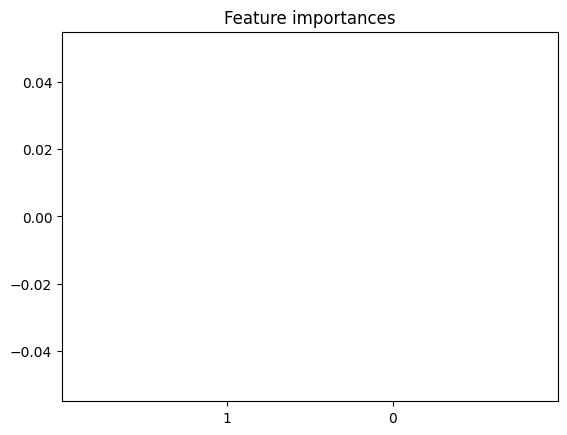

In [56]:
input_cols = ['Scale_1','Inst_1']
df_x = dataset_PT.scv_imputed[input_cols]
df_y = dataset_PT.scv_imputed[crisis_cols]
df_y = df_y.astype(int)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
# print(confusion_matrix(y_test, rfc_pred))

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [50]:
input_cols

['Pop',
 'Terr',
 'Cap',
 'Hierarchy',
 'Government',
 'Infrastructure',
 'Information',
 'Money',
 'MSP']